In [143]:
import os
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import statistics as stats
import numpy as np
#from sklearn_pandas import CategoricalImputer

from IPython.display import display, HTML
%matplotlib inline

In [211]:
os.chdir('/Users/suma/Documents/01 Data Science/Titanic Problem/')
df_train = pd.read_csv('titanic_train.csv')
df_train.head(10)
df_train.info()
df_test = pd.read_csv('titanic_test.csv')
#display(HTML(df_train.to_html())) - To display full dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
Ticket         891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [212]:
def extract_title(name):
     return name.split(',')[1].split('.')[0].strip()
df_train['Title'] = df_train['Name'].map(extract_title)

#### Imputing missing values of Age column based on Title column mean ages

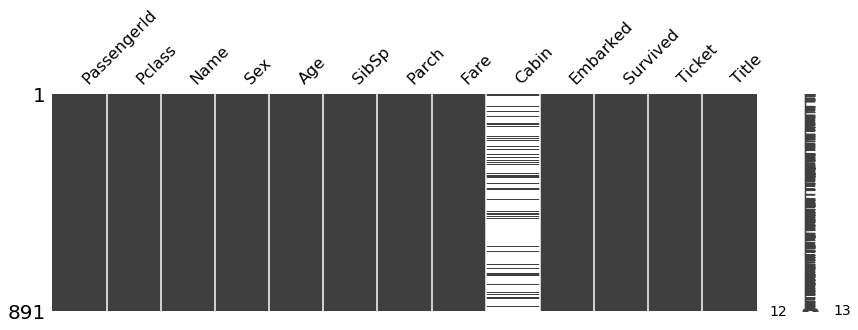

In [213]:
#df_train.groupby("Title").mean()['Age']
df_train["Age"] = df_train.groupby("Title").transform(lambda x: x.fillna(x.mean()))['Age']
msno.matrix(df_train, figsize = (14,4), width_ratios = (15,1))

In [95]:
df_train['Cabin1'] = df_train['Cabin'].str[0]

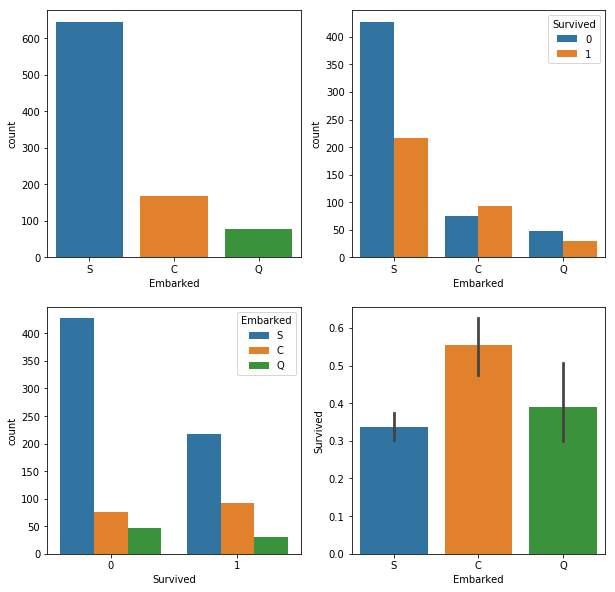

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Embarked', data = df_train)
plt.subplot(2,2,2)
sns.countplot(x = 'Embarked', hue='Survived', data = df_train );
plt.subplot(2,2,3)
sns.countplot(x = 'Survived', hue='Embarked', data = df_train );
plt.subplot(2,2,4)
sns.barplot(x = 'Embarked', y ='Survived', data = df_train );

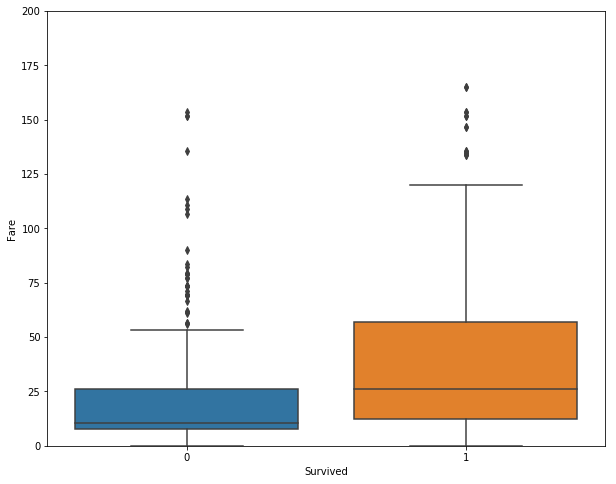

In [59]:
plt.figure(figsize = (10,8))
plt.subplot(1,1,1)
plt.ylim(0,200)
sns.boxplot(x="Survived", y="Fare", data=df_train);

In [77]:
len(df_train.Age[df_train.Survived==0])

549

/Users/suma/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/suma/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


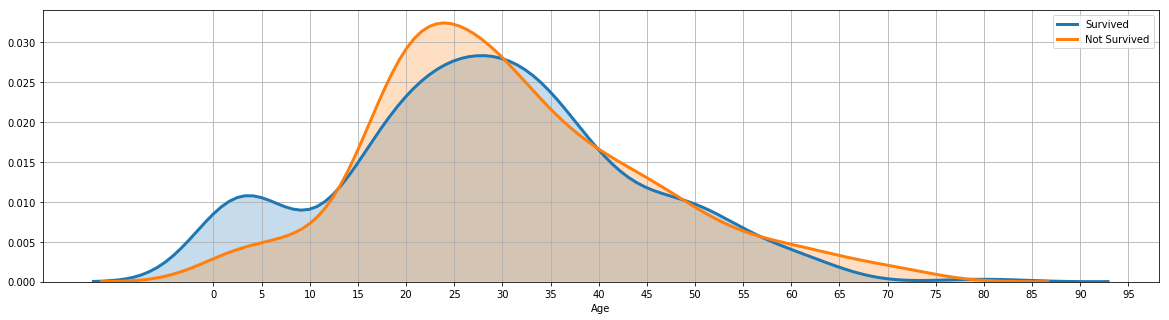

In [99]:
plt.figure(figsize = (20,5))
ax = plt.subplot(111)
major_ticks = np.arange(0,101,5)
ax.set_xticks(major_ticks)
ax.grid()
sns.distplot(df_train.Age[df_train.Survived==1], hist = False, kde = True, kde_kws = {'shade':True, 'linewidth': 3},label ='Survived');
sns.distplot(df_train.Age[df_train.Survived==0], hist = False, kde = True, kde_kws = {'shade':True, 'linewidth': 3}, label = 'Not Survived');

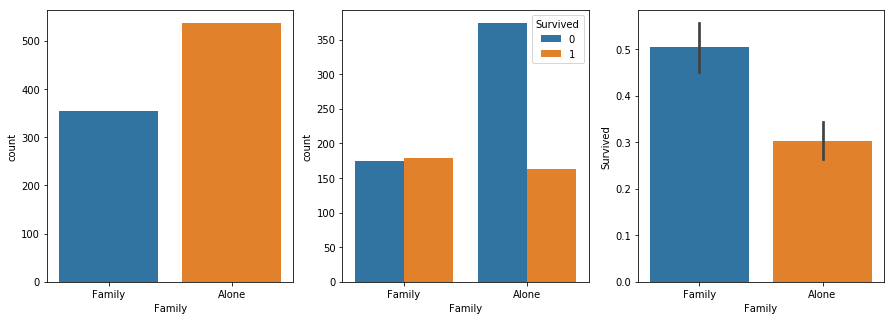

In [138]:
def Family_fn(x):
    if(x[0]+x[1] > 0):
        return 'Family'
    else:
        return 'Alone'
df_train['Family'] = df_train[['SibSp','Parch']].apply(Family_fn, axis = 1)
plt.figure(figsize =(15,5) )
plt.subplot(131)
sns.countplot(x = 'Family', data=df_train);
plt.subplot(132)
sns.countplot(x = 'Family', hue = 'Survived', data=df_train);
plt.subplot(133)
sns.barplot(x = 'Family', y = 'Survived', data = df_train);

In [150]:
def Gender_fn(x):
    if(x[0] <= 16):
        return 'child'
    else:
        return x[1]
df_train['Gender'] = df_train[['Age','Sex']].apply(Gender_fn, axis = 1)

In [152]:
df_train.Gender.unique()

array(['male', 'female', 'child'], dtype=object)

In [153]:
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Survived', 'Ticket', 'Title', 'Gender', 'Family'],
      dtype='object')

In [155]:
le = preprocessing.LabelEncoder()
df_train['Family'] = le.fit_transform(df_train['Family']) 
df_train['Gender'] = le.fit_transform(df_train['Gender']) 

In [157]:
x_columns = ['Gender', 'Age', 'Family','Fare']
X_train = df_train[x_columns]
y_train = df_train['Survived']

In [202]:
#88 152
print(df_test[df_test.index.isin([88,152]) ])
df_test['Age'][df_test.index == 88] = df_test['Age'][df_test.Gender==1].mean()
df_test['Fare'][df_test.index == 152] = df_test['Fare'][df_test.Pclass==3].mean()
print(df_test[df_test.index.isin([88,152]) ])

     PassengerId  Pclass                     Name     Sex        Age  SibSp  \
88           980       3  O'Donoghue, Ms. Bridget  female  32.583677      0   
152         1044       3       Storey, Mr. Thomas    male  60.500000      0   

     Parch  Ticket       Fare Cabin Embarked Title  Family  Gender  
88       0  364856   7.750000   NaN        Q    Ms       0       1  
152      0    3701  12.459678   NaN        S    Mr       0       2  
     PassengerId  Pclass                     Name     Sex        Age  SibSp  \
88           980       3  O'Donoghue, Ms. Bridget  female  32.583677      0   
152         1044       3       Storey, Mr. Thomas    male  60.500000      0   

     Parch  Ticket       Fare Cabin Embarked Title  Family  Gender  
88       0  364856   7.750000   NaN        Q    Ms       0       1  
152      0    3701  12.459678   NaN        S    Mr       0       2  


/Users/suma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/suma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [201]:
df_test['Age'].loc[df_test.index == 88]

88    32.583677
Name: Age, dtype: float64

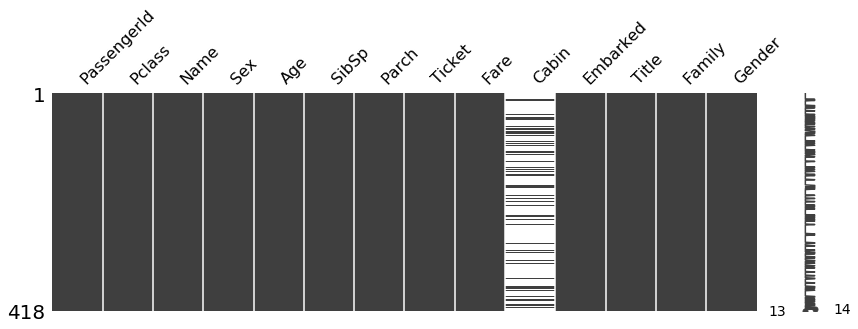

In [203]:
#df_train.groupby("Title").mean()['Age']
df_test['Title'] = df_test['Name'].map(extract_title)
df_test["Age"] = df_test.groupby("Title").transform(lambda x: x.fillna(x.mean()))['Age']
msno.matrix(df_test, figsize = (14,4), width_ratios = (15,1))
df_test['Family'] = df_test[['SibSp','Parch']].apply(Family_fn, axis = 1)
df_test['Gender'] = df_test[['Age','Sex']].apply(Gender_fn, axis = 1)
df_test['Family'] = le.fit_transform(df_test['Family']) 
df_test['Gender'] = le.fit_transform(df_test['Gender']) 
X_test = df_test[x_columns]

In [204]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9820426487093153

In [206]:
df_test['Survived'] = y_pred

In [214]:
df_train.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Ticket,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S,0,A/5 21171,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,1,PC 17599,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S,1,STON/O2. 3101282,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,1,113803,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S,0,373450,Mr
5,6,3,"Moran, Mr. James",male,32.368090,0,0,8.4583,NaN,Q,0,330877,Mr
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S,0,17463,Mr
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,S,0,349909,Master
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,S,1,347742,Mrs
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,C,1,237736,Mrs


In [209]:
df_test[['PassengerId','Survived']].to_csv('prediction_rf.csv',Index =False)